In [1]:
from IPython.display import Image
import os
import json

In [2]:
%%capture
!pip3 install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install opencv-python==4.1.2.30 ffmpeg-python==0.2.0 scikit-image==0.16.2
!pip3 install pillow==7.0.0 scipy==1.2.1 tqdm==4.43.0 munch==2.5.0

In [3]:
# %%capture
!git clone https://github.com/clovaai/stargan-v2
%cd stargan-v2
# !bash download.sh pretrained-network-afhq
# !bash download.sh wing
!bash download.sh celeba-hq-dataset
!bash download.sh pretrained-network-celeba-hq
!bash download.sh wing
%cd ..


fatal: destination path 'stargan-v2' already exists and is not an empty directory.
/project/cs505/tlaj/CS585-Style-Transfer-GAN/stargan-v2
download.sh: line 9: 
StarGAN v2
Copyright (c) 2020-present NAVER Corp.

This work is licensed under the Creative Commons Attribution-NonCommercial
4.0 International License. To view a copy of this license, visit
http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.
: No such file or directory
for details.

--2021-04-25 23:17:56--  https://www.dropbox.com/s/f7pvjij2xlpff59/celeba_hq.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/f7pvjij2xlpff59/celeba_hq.zip [following]
--2021-04-25 23:17:57--  https://www.dropbox.com/s/raw/f7pvjij2xlpff59/celeba_hq.zip
Reusing existing c

## Preprocess Image files

In [45]:
female_celebs = 'stargan-v2/assets/representative/celeba_hq/src/female'
male_celebs = 'stargan-v2/assets/representative/celeba_hq/src/male'

for file in os.listdir(female_celebs):
    os.remove(os.path.join(female_celebs, file))
    
for file in os.listdir(male_celebs):
    os.remove(os.path.join(male_celebs, file))

In [46]:
%cd stargan-v2
!python main.py --mode align \
               --inp_dir "../celebrity-faces/male" \
               --out_dir assets/representative/celeba_hq/src/male
%cd ..

/project/cs505/tlaj/CS585-Style-Transfer-GAN/stargan-v2
Namespace(batch_size=8, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints', ds_iter=100000, eval_dir='expr/eval', eval_every=50000, f_lr=1e-06, hidden_dim=512, img_size=256, inp_dir='../celebrity-faces/male', lambda_cyc=1, lambda_ds=1, lambda_reg=1, lambda_sty=1, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='align', num_domains=2, num_outs_per_domain=10, num_workers=4, out_dir='assets/representative/celeba_hq/src/male', print_every=10, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=0, sample_dir='expr/samples', sample_every=5000, save_every=10000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/celeba_hq/train', val_batch_size=32, val_img_dir='data/celeba_hq/val', w_hpf=1, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 434673

In [48]:
%cd stargan-v2
!python main.py --mode align \
               --inp_dir "../celebrity-faces/female" \
               --out_dir assets/representative/celeba_hq/src/female
%cd ..

/project/cs505/tlaj/CS585-Style-Transfer-GAN/stargan-v2
Namespace(batch_size=8, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints', ds_iter=100000, eval_dir='expr/eval', eval_every=50000, f_lr=1e-06, hidden_dim=512, img_size=256, inp_dir='../celebrity-faces/female', lambda_cyc=1, lambda_ds=1, lambda_reg=1, lambda_sty=1, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='align', num_domains=2, num_outs_per_domain=10, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=10, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=0, sample_dir='expr/samples', sample_every=5000, save_every=10000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/celeba_hq/train', val_batch_size=32, val_img_dir='data/celeba_hq/val', w_hpf=1, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
Number of parameters of generator: 43

## Synthesize celeb faces


Synthesize output images reflecting diverse styles (e.g., hairstyle) of reference images and save generated images and interpolation videos to the expr/results directory.


In [ ]:
%cd stargan-v2
!python main.py --mode sample --num_domains 2 --resume_iter 100000 --w_hpf 1 \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --result_dir expr/results/celeba_hq \
               --src_dir assets/representative/celeba_hq/src \
               --ref_dir assets/representative/celeba_hq/ref
%cd ..

/project/cs505/tlaj/CS585-Style-Transfer-GAN/stargan-v2
Namespace(batch_size=8, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints/celeba_hq', ds_iter=100000, eval_dir='expr/eval', eval_every=50000, f_lr=1e-06, hidden_dim=512, img_size=256, inp_dir='assets/representative/custom/female', lambda_cyc=1, lambda_ds=1, lambda_reg=1, lambda_sty=1, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='sample', num_domains=2, num_outs_per_domain=10, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=10, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results/celeba_hq', resume_iter=100000, sample_dir='expr/samples', sample_every=5000, save_every=10000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/celeba_hq/train', val_batch_size=32, val_img_dir='data/celeba_hq/val', w_hpf=1.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')

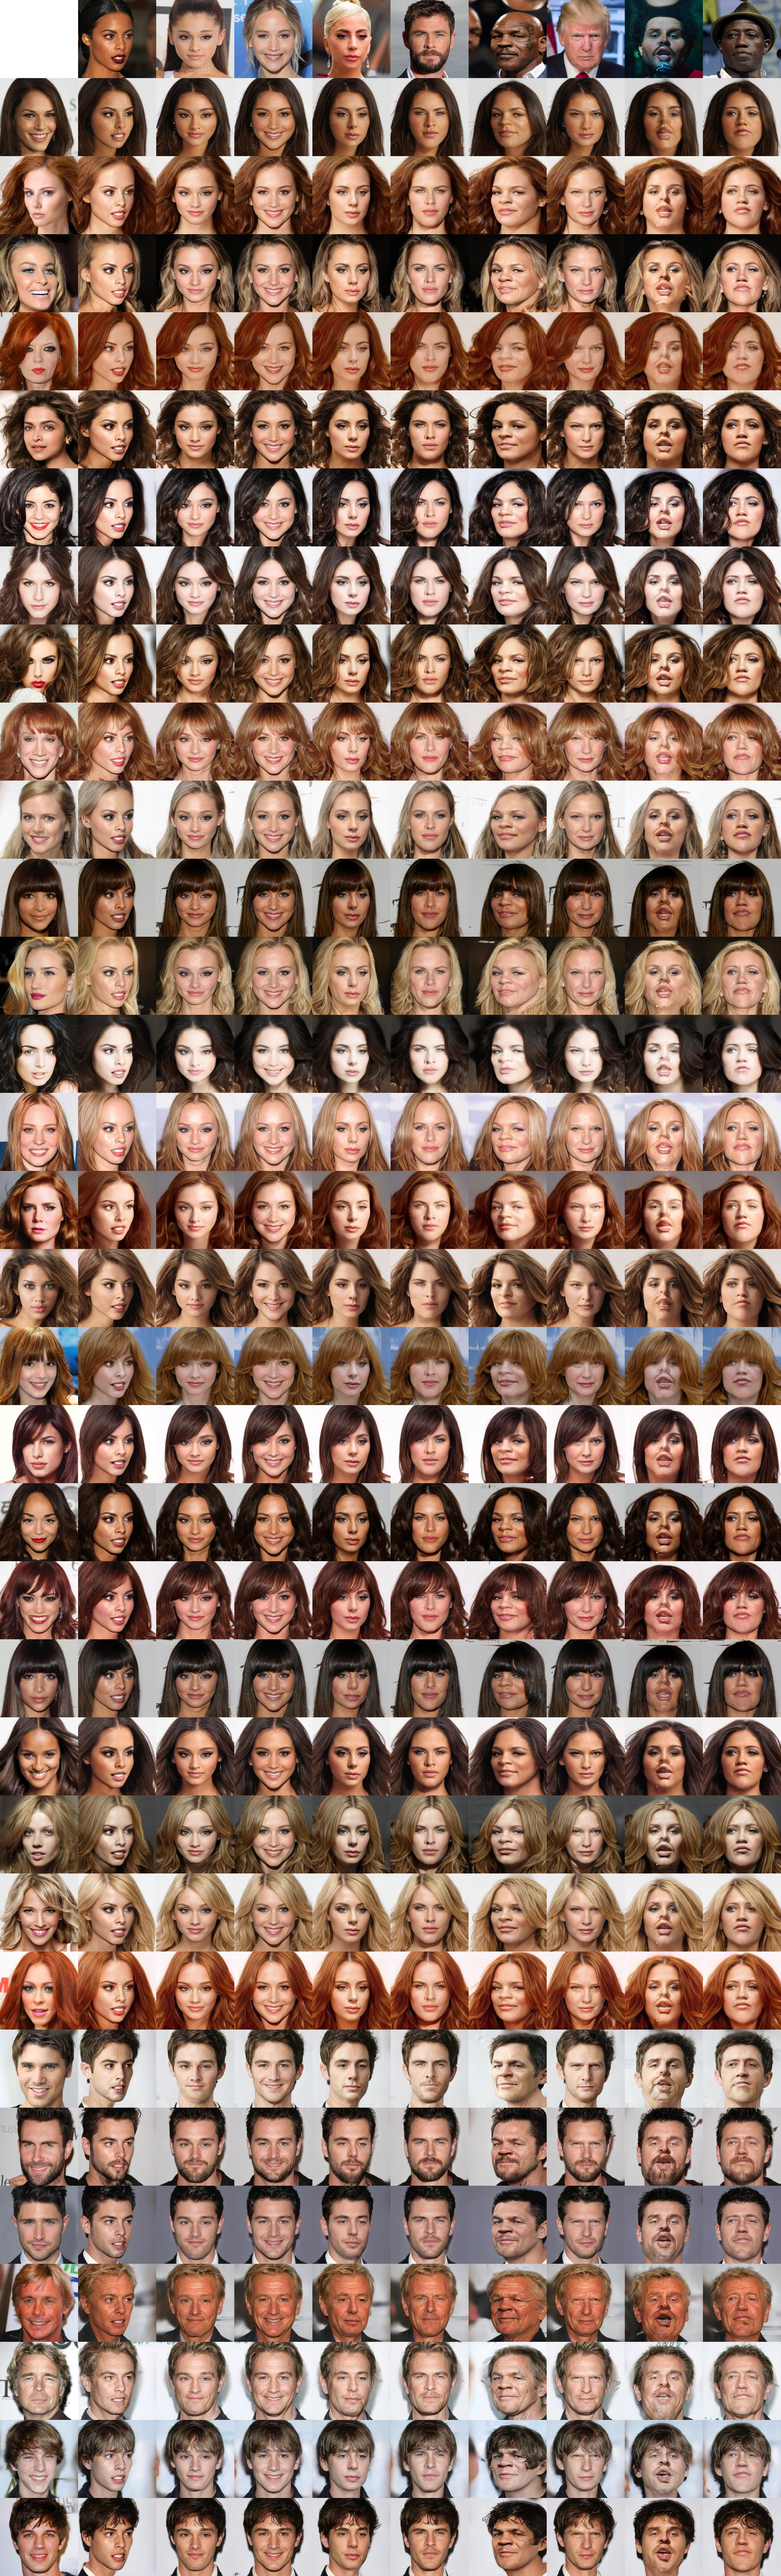

In [23]:
output_image_file = "stargan-v2/expr/results/celeba_hq/reference.jpg"
Image(output_image_file)

## Evaluate Results

Evaluate StarGAN v2 using Fréchet Inception Distance (FID) and Learned Perceptual Image Patch Similarity (LPIPS)

In [24]:
%cd stargan-v2
!python main.py --mode eval --num_domains 2 --w_hpf 1 \
               --resume_iter 100000 \
               --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --eval_dir expr/eval/celeba_hq

%cd ..

/project/cs505/tlaj/CS585-Style-Transfer-GAN/stargan-v2
Namespace(batch_size=8, beta1=0.0, beta2=0.99, checkpoint_dir='expr/checkpoints/celeba_hq', ds_iter=100000, eval_dir='expr/eval/celeba_hq', eval_every=50000, f_lr=1e-06, hidden_dim=512, img_size=256, inp_dir='assets/representative/custom/female', lambda_cyc=1, lambda_ds=1, lambda_reg=1, lambda_sty=1, latent_dim=16, lm_path='expr/checkpoints/celeba_lm_mean.npz', lr=0.0001, mode='eval', num_domains=2, num_outs_per_domain=10, num_workers=4, out_dir='assets/representative/celeba_hq/src/female', print_every=10, randcrop_prob=0.5, ref_dir='assets/representative/celeba_hq/ref', result_dir='expr/results', resume_iter=100000, sample_dir='expr/samples', sample_every=5000, save_every=10000, seed=777, src_dir='assets/representative/celeba_hq/src', style_dim=64, total_iters=100000, train_img_dir='data/celeba_hq/train', val_batch_size=32, val_img_dir='data/celeba_hq/val', w_hpf=1.0, weight_decay=0.0001, wing_path='expr/checkpoints/wing.ckpt')
N

In [38]:
EVAL_DIR = "stargan-v2/expr/eval/celeba_hq"
for file in os.listdir(EVAL_DIR):
    if "json" in file:
        with open(os.path.join(EVAL_DIR, file)) as json_file:
            data = json.load(json_file)
            for key, val in data.items():
                print(f"{key}: {val}\n")

LPIPS_latent/male2female: 0.44466675631701946

LPIPS_latent/female2male: 0.45964223332703114

LPIPS_latent/mean: 0.4521544948220253

FID_reference/male2female: 19.91875319966728

FID_reference/female2male: 27.940886331893935

FID_reference/mean: 23.929819765780607

FID_latent/male2female: 9.988664547133222

FID_latent/female2male: 17.41931115916517

FID_latent/mean: 13.703987853149195

LPIPS_reference/male2female: 0.374987481161952

LPIPS_reference/female2male: 0.4008955527096987

LPIPS_reference/mean: 0.38794151693582535

